# **Implémentation de l'arbre de Decision**

In [ ]:
#bibiliothèque 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
cd "/content/gdrive/"

/content/gdrive


In [ ]:
cd "My Drive/"

/content/gdrive/My Drive


In [ ]:
cd "Machine Learning Analytics_vidhaye Course"

/content/gdrive/My Drive/Machine Learning Analytics_vidhaye Course


In [ ]:
pwd

'/content/gdrive/MyDrive/Machine Learning Analytics_vidhaye Course'

In [ ]:
#reading the data
data=pd.read_csv('data_cleaned.csv')

In [ ]:
data.shape

(891, 25)

In [ ]:
data.head

In [ ]:
data.isnull().sum()

In [ ]:
#extraction des variables indépendant et  dépendant
y = data['Survived']
X = data.drop(['Survived'], axis=1)

In [ ]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [ ]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [ ]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [ ]:
# distribution in validation set
y_valid.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [ ]:
#shape of training set
X_train.shape, y_train.shape

((668, 24), (668,))

In [ ]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [ ]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
#checking the training score
dt_model.score(X_train, y_train)

0.9880239520958084

In [ ]:
dt_model.score(X_valid, y_valid)

0.7533632286995515

In [ ]:
#predictions on validation set
dt_model.predict(X_valid)

In [ ]:
dt_model.predict_proba(X_valid)

In [ ]:
y_pred = dt_model.predict_proba(X_valid)[:,1]

In [ ]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [ ]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

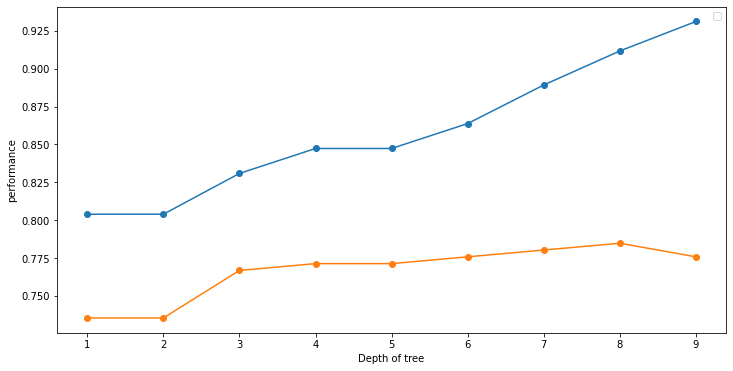

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

**Optimisation de la performance de l'arbre de décision**

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [ ]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [ ]:
#Training score
dt_model.score(X_train, y_train)

0.8802395209580839

In [ ]:
#Validation score
dt_model.score(X_valid, y_valid)

0.8116591928251121

In [ ]:
from sklearn import tree

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=3,filled=True)

In [ ]:
!dot -Tpng tree.dot -o tree.png

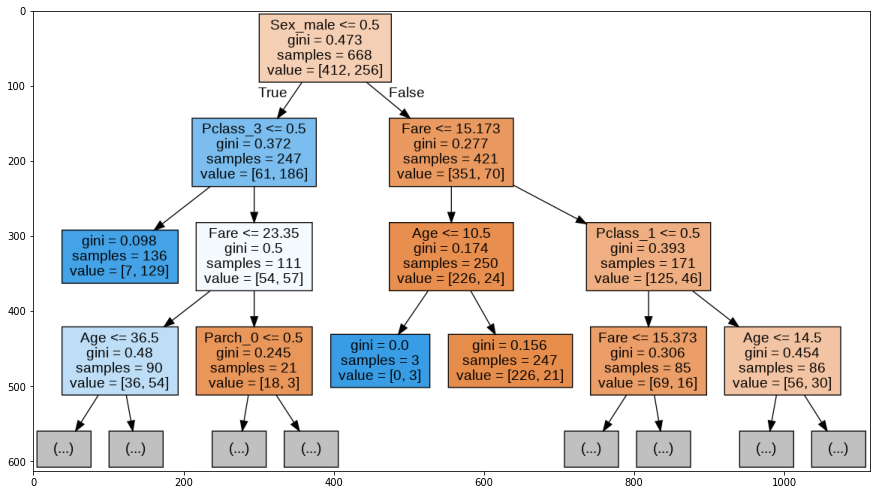

In [ ]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)